In [1]:
import numpy as np
import pandas as pd
from project_lib import load_data, AnalysisCurvesDisplay

In [2]:
df = load_data()

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('target', axis=1)
y = df.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y,
    test_size=23,
    random_state=131,
)

In [6]:
dt = DecisionTreeClassifier(
    min_samples_leaf=5,
    random_state=44, 
    class_weight='balanced'
).fit(x_train, y_train)

In [7]:
dt.score(x_train, y_train), dt.score(x_test, y_test)

(0.8821428571428571, 0.8695652173913043)

In [8]:
svm = SVC(probability=True).fit(x_train, y_train)
svm.score(x_train, y_train), svm.score(x_test, y_test)

(0.6785714285714286, 0.6521739130434783)

In [9]:
res_dt = dict(
    y_true=y, 
    prob_predict=dt.predict_proba(X)[:,1],
    name='Decision Tree'
)

res_svm = dict(
    prob_predict=svm.predict_proba(X)[:,1],
    y_true=y,
    name='SVM'
)

In [10]:
dt_dis = AnalysisCurvesDisplay(**res_dt)
svm_dis = AnalysisCurvesDisplay(**res_svm)

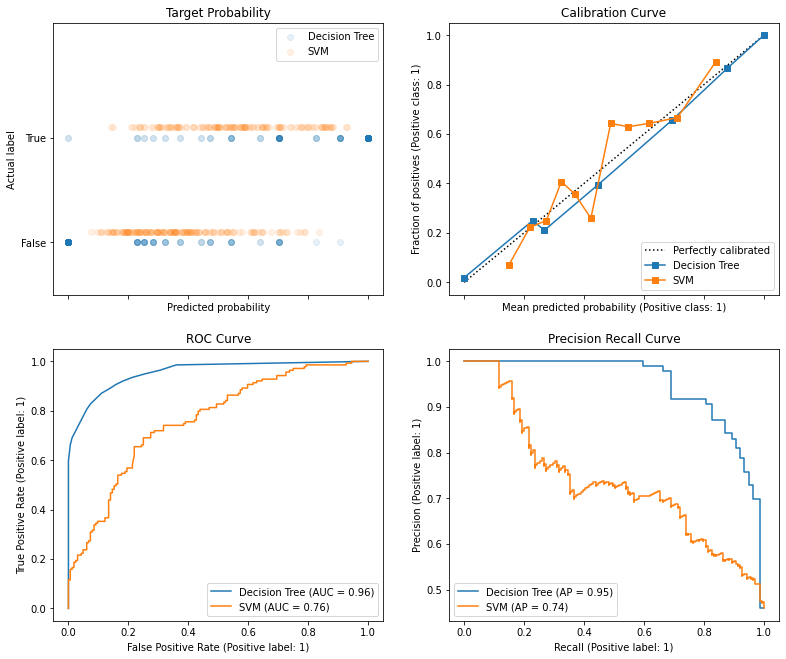

In [11]:
fig, axes = AnalysisCurvesDisplay.create_frames()
dt_dis.plot(*axes)
svm_dis.plot(*axes)